In [1]:
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# plot individual file

In [2]:
def import_file(file):
    colnames = ["Wavelength (um)","Flux (Jy)","Statistical Error (Jy)"]
    df = pd.read_csv(file,sep='\s+',skiprows=19,names=colnames)
    return df

# plot flux vs. wavelength from file
def graph(file,ymin,ymax):
    df = import_file(file)
    plot(df,ymin,ymax)

# plot flux vs. wavelength from a dataframe
def plot(df,ymin=-1,ymax=10):
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
    ax1.set_ylim(ymin,ymax)
    
    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Flux (Jy)",fontsize=16)
    ax1.set_title(file,fontsize=18)


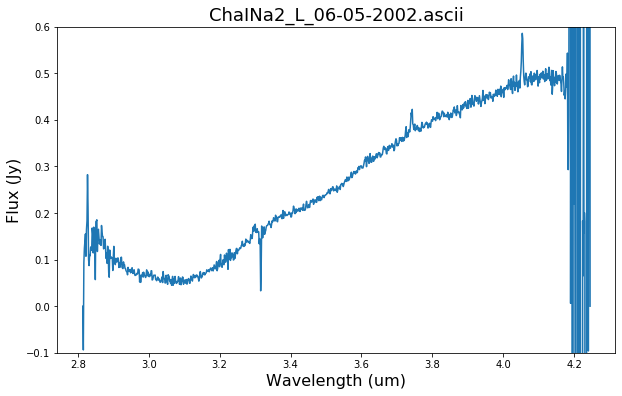

In [3]:
file = "ChaINa2_L_06-05-2002.ascii"
graph(file,-0.1,0.6)

# normalize data

In [4]:
def normalize(file):
    df = import_file(file)
    
    # exclude outliers from the data; limit range
    df1 = df[df["Statistical Error (Jy)"]<0.1]

    # fit curve to the data
    x_val,y_val,err = df1["Wavelength (um)"],df1["Flux (Jy)"],df1["Statistical Error (Jy)"]
    def polyfunc(x, a, b, c, d):
        return a*x**3 + b*x**2 + c*x + d #polynomial fit
    popt, _ = curve_fit(polyfunc, x_val, y_val)
    a,b,c,d = popt
    y_resid = polyfunc(x_val, *popt)
    
    # normalize (divide max flux from entire dataset)
    max_val = max(polyfunc(x_val,*popt))
    y_val_norm = df["Flux (Jy)"]/max_val
    
    df_norm = pd.DataFrame()
    df_norm["Wavelength (um)"] = df["Wavelength (um)"]
    df_norm["Flux (Jy)"] = y_val_norm
    return df_norm

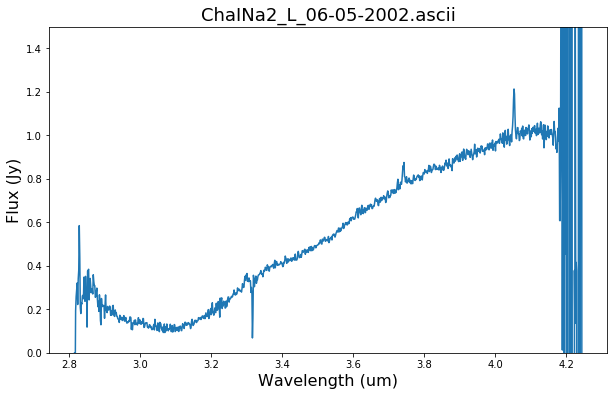

In [5]:
# plot normalized file
file = "ChaINa2_L_06-05-2002.ascii"
plot(normalize(file),0,1.5)


# plot all files

In [6]:
# 66 files
# all files have 1024 rows

file_names = ["ChaINa2_L_06-05-2002.ascii",
              "ChaIRN_1301_jan_L.ascii",
              "ChaIRN_jan_L.ascii",
              "CRBR2422_L_02-05-2002.ascii",
              "EC82_L_07-05-2002.ascii",
              "EC90A_L_07-05-2002.ascii",
              "EC90B_L_07-05-2002.ascii",
              "Elias32_L_02-05-2002.ascii",
              "GL961E_jan_L.ascii",
              "GL961W_jan_L.ascii",
              "GL989_jan_L.ascii",
              "GSS30IRS1_L_12-09-2001.ascii",
              "HH100_L.ascii",
              "HH46_L.ascii",
              "HH46_L_TOTAL.ascii",
              "HH54_L.ascii",
              "IRAS08211_jan_L.ascii",
              "IRAS08261_jan_L.ascii",
              "IRAS08375_L.ascii",
              "IRAS08375A_1301_jan_L.ascii",
              "IRAS08375B_1301_jan_L.ascii",
              "IRAS08448_jan_L.ascii",
              "IRAS08470_jan_L.ascii",
              "IRAS09017_jan_L.ascii",
              "IRAS11068_jan_L.ascii",
              "IRS42_L_13-08-2001.ascii",
              "IRS43_L_02-05-2002.ascii",
              "IRS44_L_02-05-2002.ascii",
              "IRS46_L_02-05-2002.ascii",
              "IRS48_L_05-05-2002.ascii",
              "IRS51_L_03-09-2001.ascii",
              "IRS54_L_05-05-2002.ascii",
              "IRS63_L_21-08-2001.ascii",
              "L1489_jan_L.ascii",
              "L1489_L_23-08-2002.ascii",
              "LLN20_L_15-11-2001.ascii",
              "LLN33_L_13-11-2001.ascii",
              "LLN47_L_11-11-2001.ascii",
              "LMCP2_L_15-11-2001.ascii",
              "NGC3576A_L_06-05-2002.ascii",
              "NGC3576B_L_06-05-2002.ascii",
              "RCRAIRA5A_L_07-05-2002.ascii",
              "RCRAIRA5B_L_07-05-2002.ascii",
              "RCRAIRS7A_L_04-07-2002.ascii",
              "RCRAIRS7B_L_04-07-2002.ascii",
              "Reipurth50_L.ascii",
              "SVS4-10_L.ascii",
              "SVS4-12_L.ascii",
              "SVS4-2_L.ascii",
              "SVS4-3_L.ascii",
              "SVS4-4_L.ascii",
              "SVS4-5_L_07-05-2002.ascii",
              "SVS4-6_L.ascii",
              "SVS4-7_L.ascii",
              "SVS4-8_L.ascii",
              "SVS4-9_L_07-05-2002.ascii",
              "T42_L.ascii",
              "TPSC1_L_13-11-2001.ascii",
              "TPSC78_L_13-11-2001.ascii",
              "VSSG17_L_02-05-2002.ascii",
              "VSSG1_L_07-05-2001.ascii",
 #             "VVSer_set1_L.ascii",
              "W33A_L_04-08-2001.ascii",
              "WL12_L_07-05-2002.ascii",
              "WL16_L_07-05-2002.ascii",
              "WL20_L_02-05-2002.ascii",
              "WL20E_L_02-05-2002.ascii"]

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

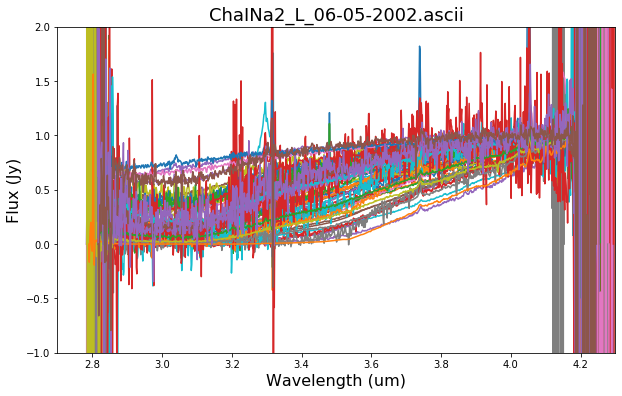

In [7]:
### all data

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

for name in file_names:
    df = normalize(name)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
ax1.set_xlim(2.7,4.3)
ax1.set_ylim(-1,2)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

## Combine files into one grid and resolve discrepancies in wavelength arrays

In [8]:
waves = np.linspace(2.8,4.2,num=2000)

df_all = pd.DataFrame()
df_all["Wavelength (um)"] = waves
for i in range(len(file_names)):
    df = normalize(file_names[i]) # or import_file(file_names[i])
    wd = df["Wavelength (um)"]
    fd = df["Flux (Jy)"]
    fd_int = np.interp(waves,wd,fd)
    df_all["Flux (Jy) "+str(i)] = fd_int
    
df_all

,Wavelength (um),Flux (Jy) 0,Flux (Jy) 1,Flux (Jy) 2,Flux (Jy) 3,Flux (Jy) 4,Flux (Jy) 5,Flux (Jy) 6,Flux (Jy) 7,Flux (Jy) 8,...,Flux (Jy) 56,Flux (Jy) 57,Flux (Jy) 58,Flux (Jy) 59,Flux (Jy) 60,Flux (Jy) 61,Flux (Jy) 62,Flux (Jy) 63,Flux (Jy) 64,Flux (Jy) 65
0,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.130693,0.444923,0.000000,0.000000,0.000615,0.000000,0.000000,0.000000,0.000000
1,2.800700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.326359,-2.053760,0.000000,0.000000,0.274770,0.000000,0.000000,0.000000,0.000000
2,2.801401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-6.952888,-4.626755,0.000000,0.000000,0.604716,0.000000,0.000000,0.000000,0.000000
3,2.802101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-24.151634,-6.086963,0.000000,0.000000,1.138145,0.000000,0.000000,0.000000,0.000000
4,2.802801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-40.117428,-7.338641,0.000000,0.000000,1.430926,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.197199,4.366642,0.402209,2.205906,1.011391,-262.754144,-2.654706,-0.533928,-2.226860,-1.228934,...,-2.186463,0.078452,2.054451,-10.433698,5.429632,0.357847,5.274696,-5.115929,17.538109,-20.104908
1996,4.197899,2.193884,0.538769,4.233287,1.044413,-279.352512,-2.889055,-1.770866,1.110491,-11.014530,...,-0.649235,-0.629873,1.643469,-12.966055,1.813897,0.399853,0.894164,-2.615359,40.685975,-37.977165
1997,4.198599,0.652852,0.675329,12.121365,1.033269,-262.201293,-2.282421,-2.228899,2.549062,-2.335424,...,0.761488,-7.884116,-4.800765,-6.946853,4.075370,-24.598862,0.644614,-2.173136,32.903332,-51.172509
1998,4.199300,1.656198,0.644299,9.425666,1.022124,-129.430984,-53.500720,-67.078241,6.701874,8.428424,...,2.012270,3.615730,-10.552157,-2.012304,4.883238,-46.256120,0.331935,-1.905830,25.362517,-54.976315


(0.1, 1.3)

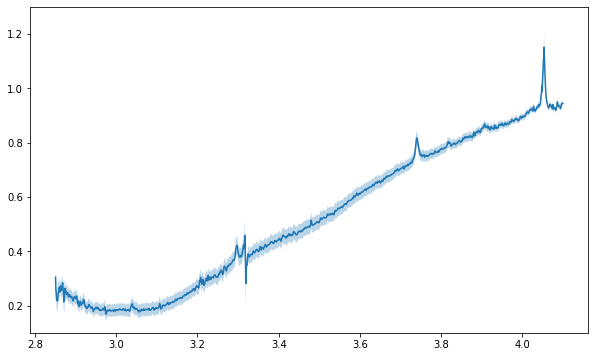

In [12]:
# exclude outliers from the data; limit range
#df=df_all[df_all.iloc[:,1:].sem(axis=1)<1] #exclude outliers
df=df_all[df_all[df_all["Wavelength (um)"]>2.85]<4.1] #restrict wavelength range

# average data across all files
df1 = df.iloc[:,1:] #without wavelength column
avg_flux = df1.mean(axis=1)
error = df1.sem(axis=1)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],avg_flux)
ax1.fill_between(df["Wavelength (um)"],avg_flux+error,avg_flux-error,alpha=0.3)
ax1.set_ylim(0.1,1.3)


In [10]:
df

,Wavelength (um),Flux (Jy) 0,Flux (Jy) 1,Flux (Jy) 2,Flux (Jy) 3,Flux (Jy) 4,Flux (Jy) 5,Flux (Jy) 6,Flux (Jy) 7,Flux (Jy) 8,...,Flux (Jy) 56,Flux (Jy) 57,Flux (Jy) 58,Flux (Jy) 59,Flux (Jy) 60,Flux (Jy) 61,Flux (Jy) 62,Flux (Jy) 63,Flux (Jy) 64,Flux (Jy) 65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,0.402209,2.205906,1.011391,-262.754144,-2.654706,-0.533928,-2.226860,-1.228934,...,-2.186463,0.078452,2.054451,-10.433698,NaN,0.357847,NaN,-5.115929,NaN,-20.104908
1996,NaN,2.193884,0.538769,NaN,1.044413,-279.352512,-2.889055,-1.770866,1.110491,-11.014530,...,-0.649235,-0.629873,1.643469,-12.966055,1.813897,0.399853,0.894164,-2.615359,NaN,-37.977165
1997,NaN,0.652852,0.675329,NaN,1.033269,-262.201293,-2.282421,-2.228899,2.549062,-2.335424,...,0.761488,-7.884116,-4.800765,-6.946853,4.075370,-24.598862,0.644614,-2.173136,NaN,-51.172509
1998,NaN,1.656198,0.644299,NaN,1.022124,-129.430984,-53.500720,-67.078241,NaN,NaN,...,2.012270,3.615730,-10.552157,-2.012304,NaN,-46.256120,0.331935,-1.905830,NaN,-54.976315


In [11]:
wave = df_all["Wavelength (um)"]

ranges = [(2.85,3.2),(3.65,4.0)]
gsubs = []
for range in ranges:
    gsubs = gsubs + np.where((wave>range[0]) & (wave<range[1]))[0].tolist()

df=df_all[df_all[df_all["Wavelength (um)"]>2.85]<4.1]
df.iloc[:,0]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
Name: Wavelength (um), Length: 2000, dtype: float64